In [1]:
import numpy as np
import colorsys
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import BarChart_plt
%matplotlib inline


In [2]:
#load data
df = pd.read_csv('vgsales.csv')
#Cleaning data. only save data before 2016
df=df[df['Year'] <= 2016]

In [3]:
#rename Platform label
df["Platform" ] = df["Platform"].replace(["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB", "XOne", "PSV", "TG16", "3DO", "PCFX"],
    ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360","Super Nintendo Entertainment System","Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation","Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16","3DO Interactive Multiplayer", "NEC PC‑FX"])
PlayStation = ['PS3', 'PS4', 'PS2', 'PlayStation', 'PSP', 'PlayStation Vita']
Nintendo = ['Wii', 'Nintendo Entertainment System', 'Game Boy','Nintendo DS', 'Super Nintendo Entertainment System', 'Nintendo Game Boy Advance','Nintendo 3DS', 'Nintendo 64','WiiU']
Microsoft = ['Xbox', 'Xbox One', 'Xbox 360']
Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TurboGrafx-16', '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX']

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,Nintendo Entertainment System,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
plt.figure(figsize=(20,10))
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

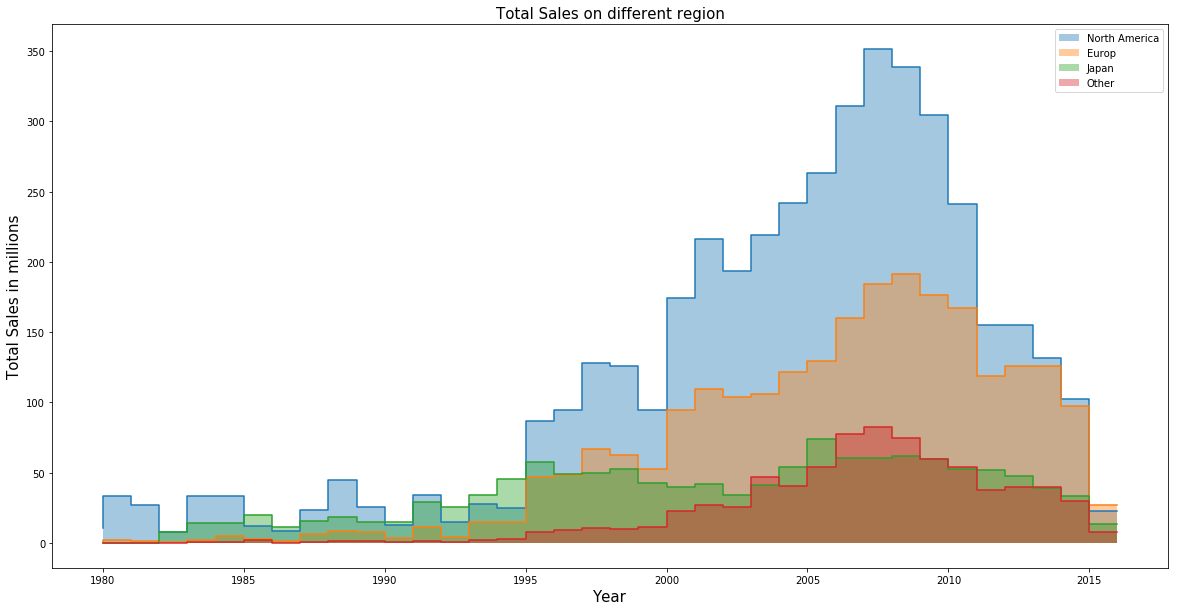

In [6]:
#plot total sales on different regions.
BarChart_plt.mul_barchart(df)

In [7]:
#processing data. Only select top 10 most sold games from 1983 to 2016
df1=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe","JP_Sales": "Japan","Other_Sales": "Other"})
df1=df1.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=True).tail(10)


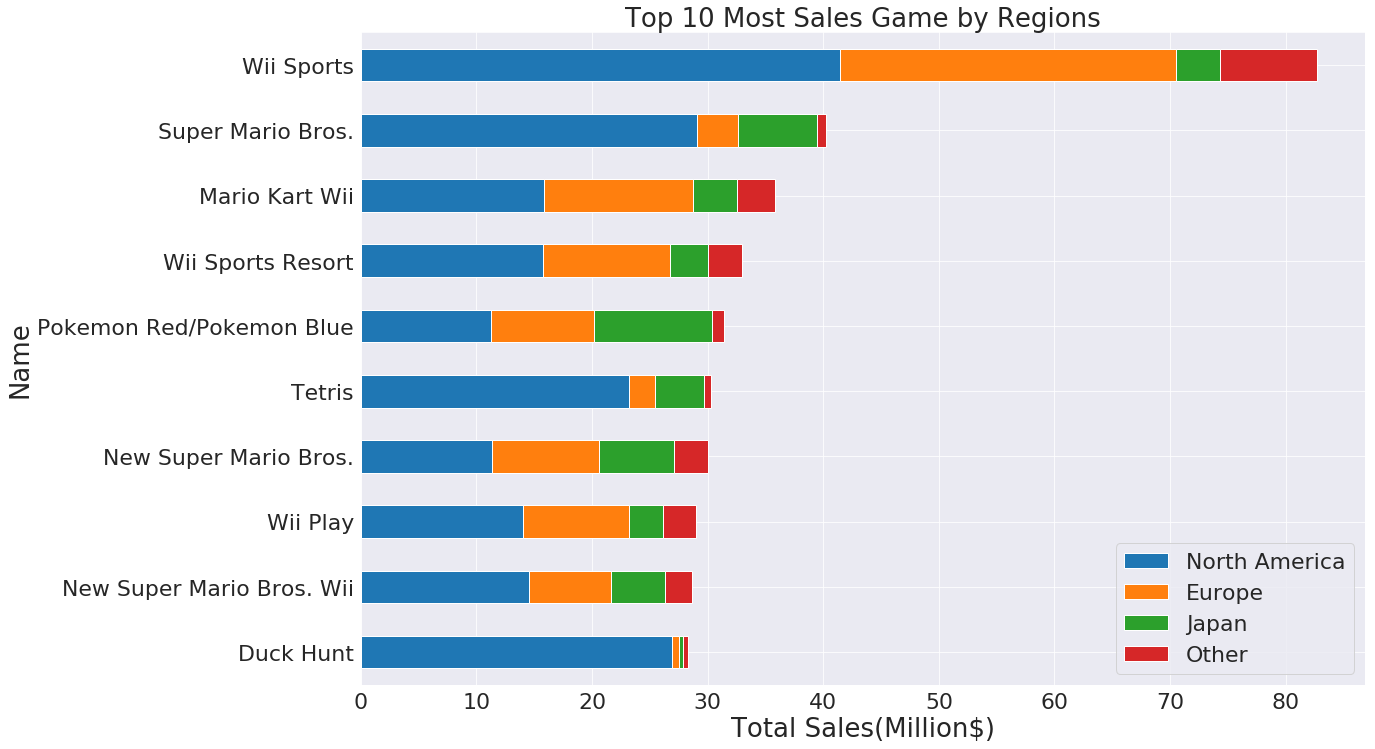

In [9]:
BarChart_plt.bar_grid(df1,"Top 10 Most Sales Game by Regions")

In [15]:
df2=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
                                  "JP_Sales": "Japan","Other_Sales": "Other"})
df2=df2.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=False).head(1000)
df2['Ave'] = df2['Global_Sales']/(2017-df2['Year'])

df2=df2.loc[:, 'Name': 'Ave'].sort_values(by="Ave", ascending=True).tail(10)

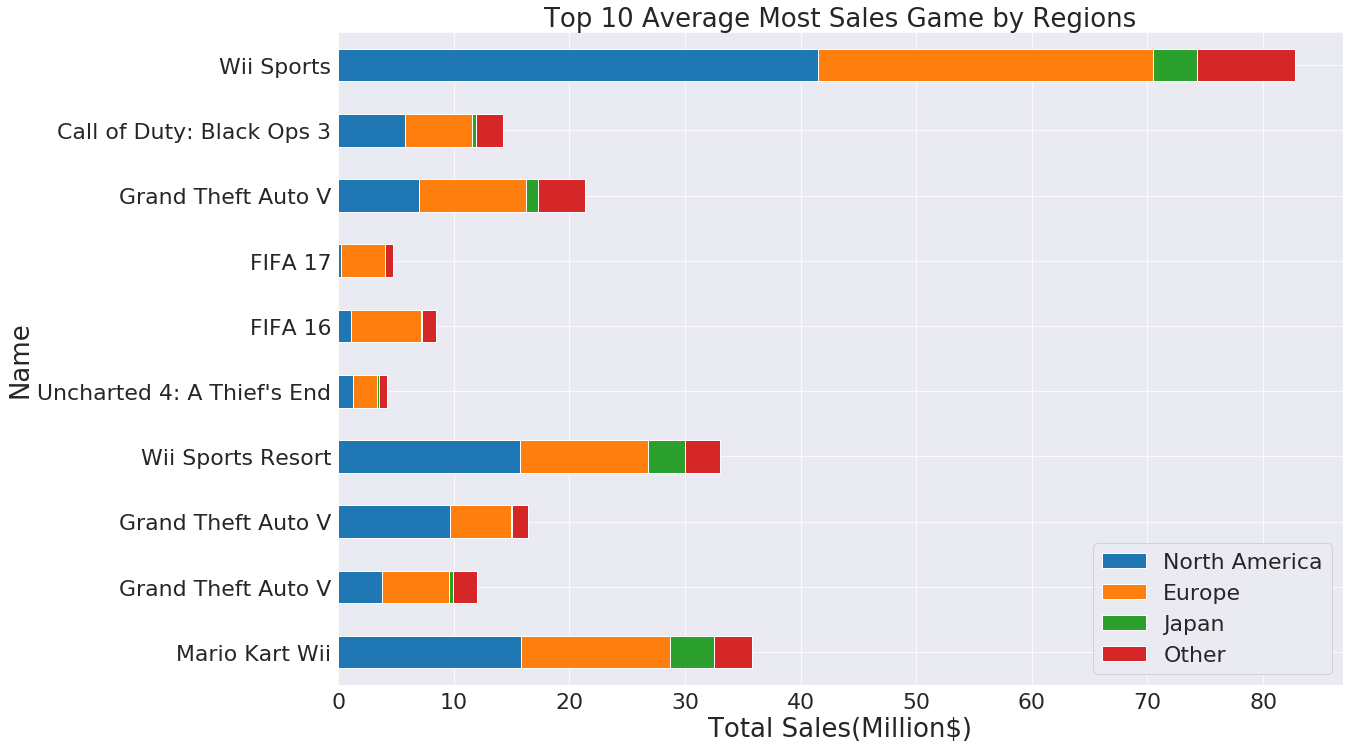

In [11]:
BarChart_plt.bar_grid(df2,"Top 10 Average Most Sales Game by Regions")

In [13]:
def Platf (c):
    if c['Platform'] in PlayStation:
        return 'PlayStation'
    elif c['Platform'] in Nintendo:
        return 'Nintendo'
    elif c['Platform'] in Microsoft:
        return 'Microsoft'
    elif c['Platform'] in Other:
        return 'Other'
    else:
        return 'Outflit'
df['Platf'] = df.apply(Platf, axis=1)

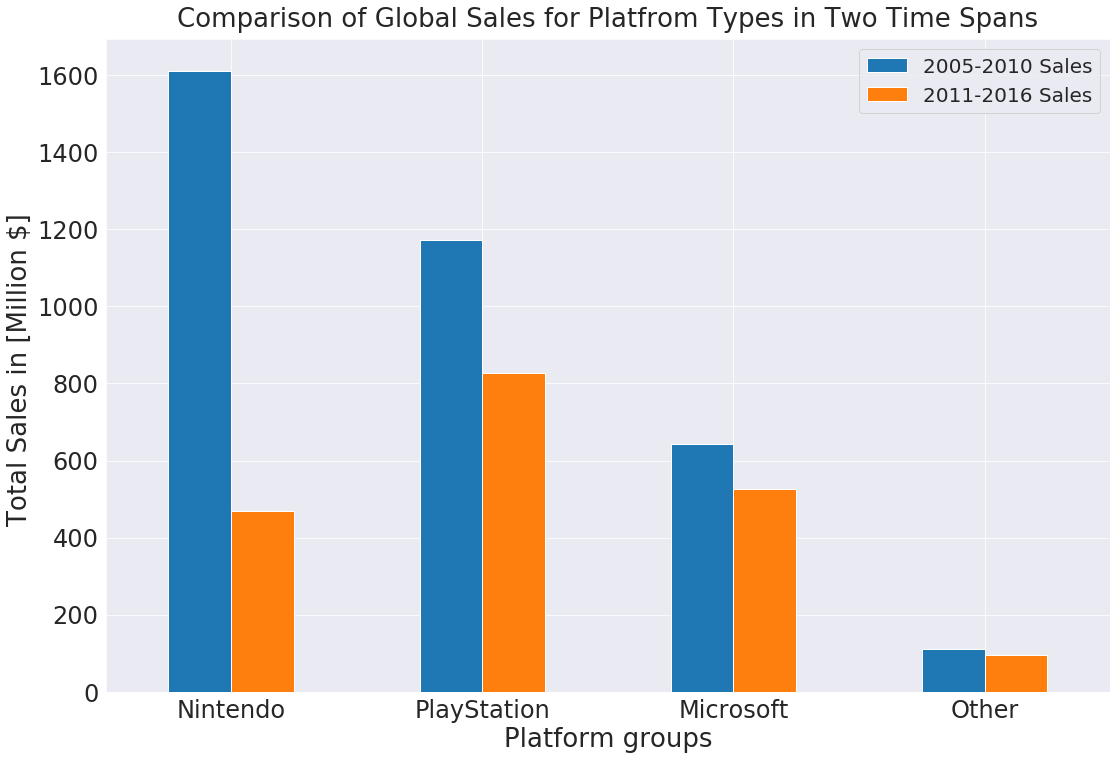

In [14]:
#deviede data to before 2011 and data after 2011
before=df[(df["Year"]>=2005) & (df["Year"]<2011)].groupby("Platf")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

after=df[(df["Year"]>=2011) & (df["Year"]<2017)].groupby("Platf")['Global_Sales'].sum().sort_values(ascending = False).reset_index()
BarChart_plt.comp_bar(before,after,"Comparison of Global Sales for Platfrom Types in Two Time Spans")